In [1]:
%pylab nbagg
import h5py
import os
import matplotlib.pyplot as plt

import scipy 
import scipy.fftpack
from scipy.fft import fft, ifft
from scipy import signal
import seaborn as sns
import fooof
from scipy import stats
from fooof import FOOOF

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")
#import healthy Q = 1 data    = model with same parameters in all regions
filename = "Healthy10s.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataHealthyOne = np.array(datapoints)
timeHealthyOne = np.array(datatime)

#import depressed model with Q = 0 in some regions
filename = "Depr10s.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataDepr = np.array(datapoints)
timeDepr = np.array(datatime)

#import depressed model with Q = 0 in some regions + stimulation applied
filename = "amp0035_tau1.h5"
with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataStim = np.array(datapoints)
timeStim = np.array(datatime)

Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>


In [3]:
#delete first 500ms from datasets (both data and time) to cut out the artefact in the beginning 

#create list with values 0 to 499 to delete first 500 rows 
list_deleterows = [*range(0,500,1)]

#delete first 500 rows from all datasets (both datapoints and time)
dataDepr = np.delete(dataDepr, list_deleterows, 0)
timeDepr = np.delete(timeDepr, list_deleterows, 0)

dataStim = np.delete(dataStim, list_deleterows, 0)
timeStim = np.delete(timeStim, list_deleterows, 0)

dataHealthyOne = np.delete(dataHealthyOne, list_deleterows, 0)
timeHealthyOne = np.delete(timeHealthyOne, list_deleterows, 0)

print(dataDepr.shape)
print(timeDepr.shape)

(9740, 4, 76, 1)
(9740,)


In [4]:
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)
#make selection of regions to loop through 
indices = [*range(0, 10, 1)] #[13,15,16,18,21,35,36,51,53,54,56,59,73,74]
#create list of indices per hemisphere
Lhem_ind = [*range(38, 76, 1)]
Rhem_ind = [*range(0, 38, 1)]

Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>


In [5]:
#select correct colomns from datasets
HealthyOne = dataHealthyOne[:, 0, :, 0]
Depressed  = dataDepr[:, 0, :, 0] 
Stim = dataStim[:, 0, :, 0] 

#important variables of dataset
sample_period = 0.0009765625 #seconds
sf = 1/sample_period #sampling frequency 
sample_rate = 1024
duration = len(timeDepr)
print(sf)

1024.0


First: plot PSD from depressed versus healthy brain 

<IPython.core.display.Javascript object>


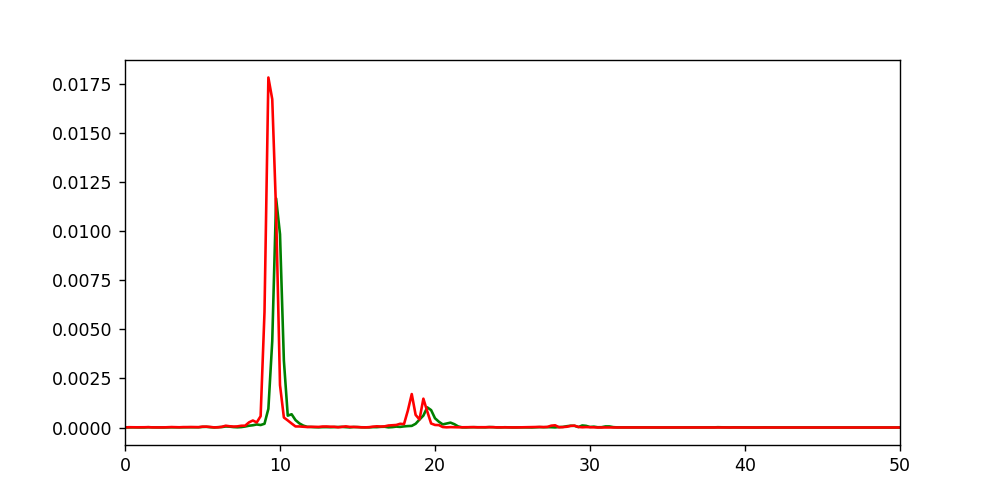

In [17]:
#plot PSD depressed versus healthy ; now for region 56 (=left DLPFC)

data_health = HealthyOne[:,56]
data_depr = Depressed[:,56]
win = 4 * sf
freqs_health, psd_health = signal.welch(data_health, sf, nperseg=win)
freqs_d, psd_d = signal.welch(data_depr, sf, nperseg=win)

plt.figure(figsize=(8, 4))
plt.xlim([0, 50])
plt.plot(freqs_health, psd_health, color =  'green')
plt.plot(freqs_d, psd_d, color = "red")
plt.show()

In [ ]:
#alpha range, from left DLPFC: healthy
freq_range = [8,12] 

#healthy 
fm = FOOOF()
fm.report(freqs_health, psd_health, freq_range)
peaks_h = fm.get_params('peak_params')

#depressed
fm_d = FOOOF()
fm_d.report(freqs_d, psd_d, freq_range)
peaks_d = fm_d.get_params('peak_params')

average across all ROIs

<IPython.core.display.Javascript object>


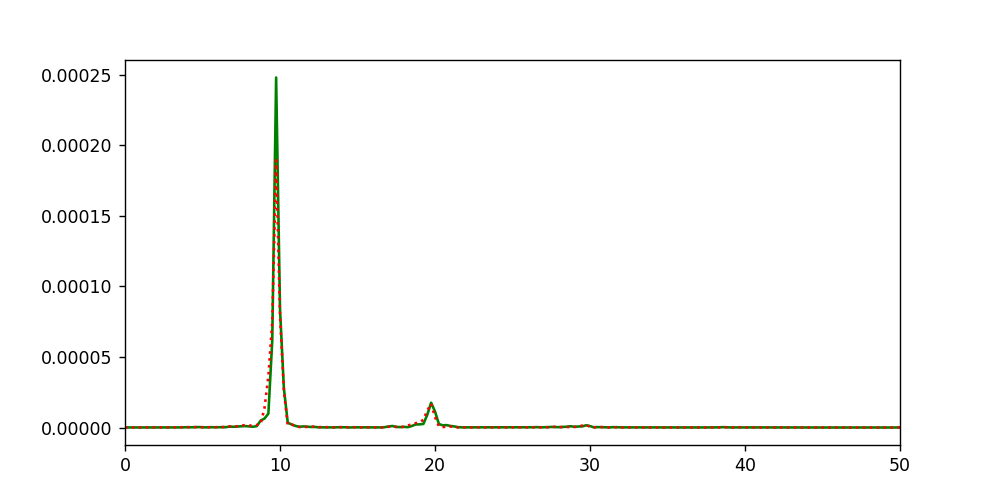

In [10]:
av_health = HealthyOne.mean(axis = 1)
av_depr = Depressed.mean(axis = 1)


#plot PSD depressed versus healthy ; average across all regions

data_health = av_health
data_depr = av_depr
win = 4 * sf
freqs_health, psd_health = signal.welch(data_health, sf, nperseg=win)
freqs_d, psd_d = signal.welch(data_depr, sf, nperseg=win)

plt.figure(figsize=(8, 4))
plt.xlim([0, 50])
plt.plot(freqs_health, psd_health, color =  'green')
plt.plot(freqs_d, psd_d, color = "red", linestyle = "dotted")
plt.show()

healthy


<IPython.core.display.Javascript object>


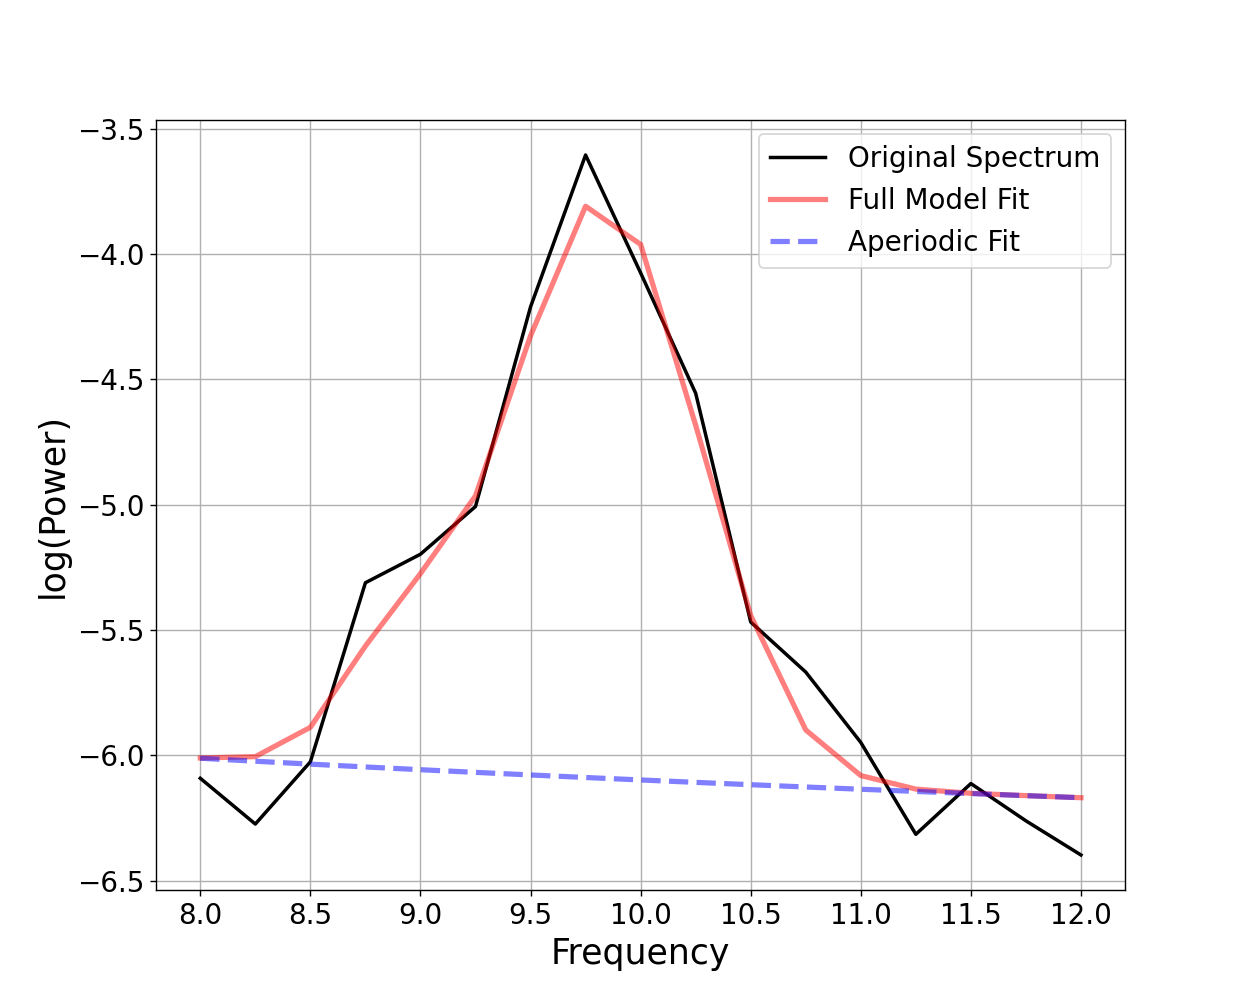

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 8 - 12 Hz                        
                                 Frequency Resolution is 0.25 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -5.2043, 0.8942                                          
                                                                                                  
                                       2 peaks were found:                                        
          

<IPython.core.display.Javascript object>


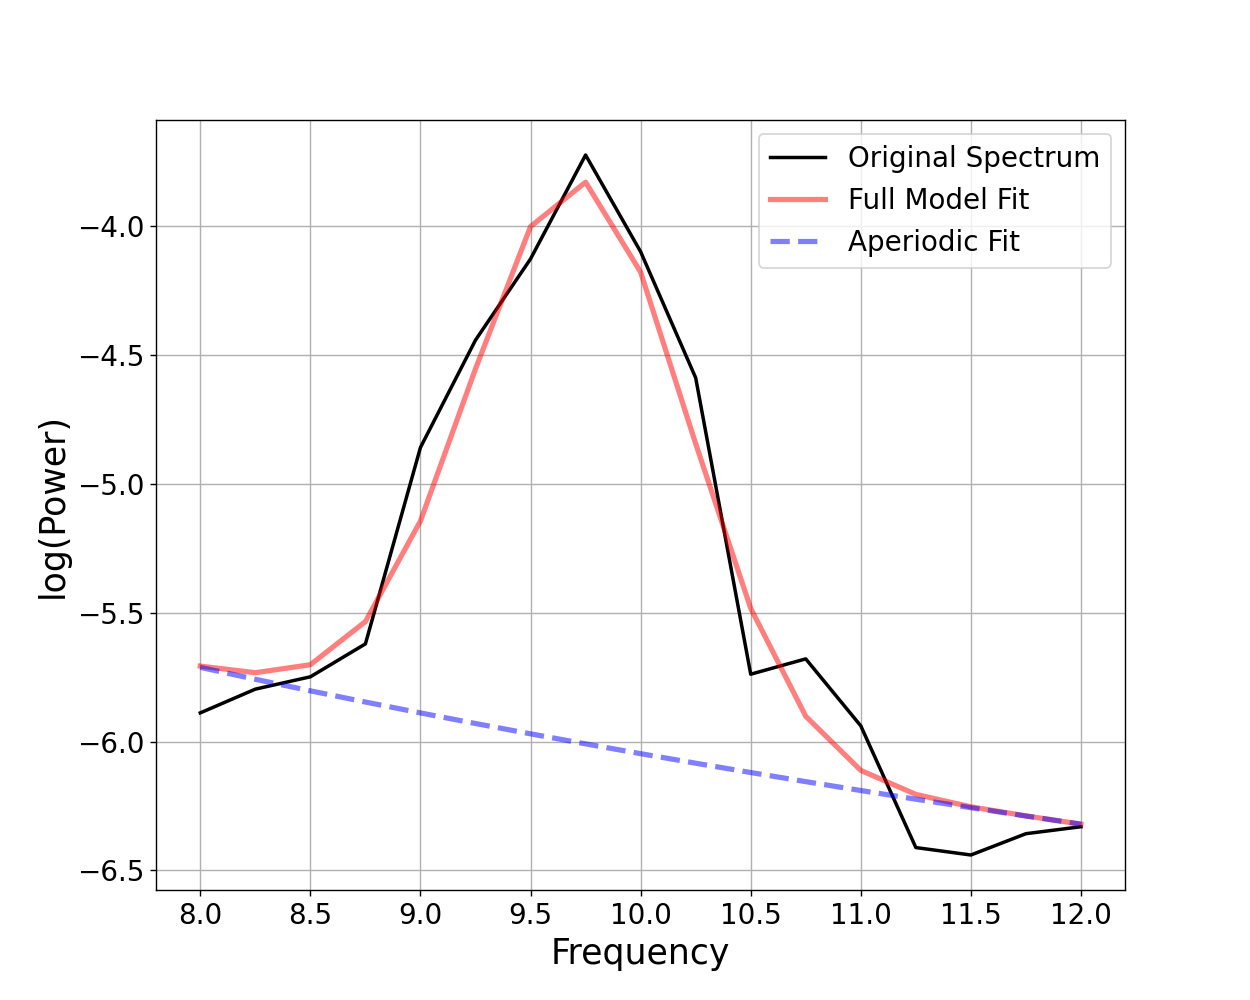

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 8 - 12 Hz                        
                                 Frequency Resolution is 0.25 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -2.5905, 3.4562                                          
                                                                                                  
                                       1 peaks were found:                                        
          

In [12]:
#alpha range
freq_range = [8,12] 

#healthy 
print("healthy")
fm = FOOOF()
fm.report(freqs_health, psd_health, freq_range)
peaks_h = fm.get_params('peak_params')

#depressed
print("depressed")
fm_d = FOOOF()
fm_d.report(freqs_d, psd_d, freq_range)
peaks_d = fm_d.get_params('peak_params')

Now, extract information about peaks in spectrum of healthy and depressed brain, do they match PSD? (still for region = 56)

In [13]:
#print the peaks information 
print("depression peaks")
print(peaks_d)
print("healthy peaks")
print(peaks_h)

#[CF, PW, BW]
#CF: center frequency of the extracted peak

#PW: power of the peak, over and above the aperiodic component

#BW: bandwidth of the extracted peak

depression peaks
[[9.72456845 2.18039856 0.98830648]]
healthy peaks
[[8.90016941 0.78229639 0.5       ]
 [9.828155   2.27868949 0.85585644]]


Results:
depression peaks
    [[9.53940507 2.13667946 0.98712509]]
healthy peaks
    [[ 9.85250524  2.13502311  0.88096864]
     [10.94516371  0.79195588  0.58164337]]

--> Depression peak is earlier than the healthy peaks; depression peak is also wider (BW)
--> Depression peak and first healthy peak have same PW (2.13): PW is power of the peak, over and above aperiodic component(?)
--> last healthy peak has lower PW and lower BW
    

GROUP ANALYSES: healthy vs depressed in three frontal areas (left)


You can extract the fitted model PSD, so the PSD without the apeariodic part 
--> do this and plot psd again 

<IPython.core.display.Javascript object>


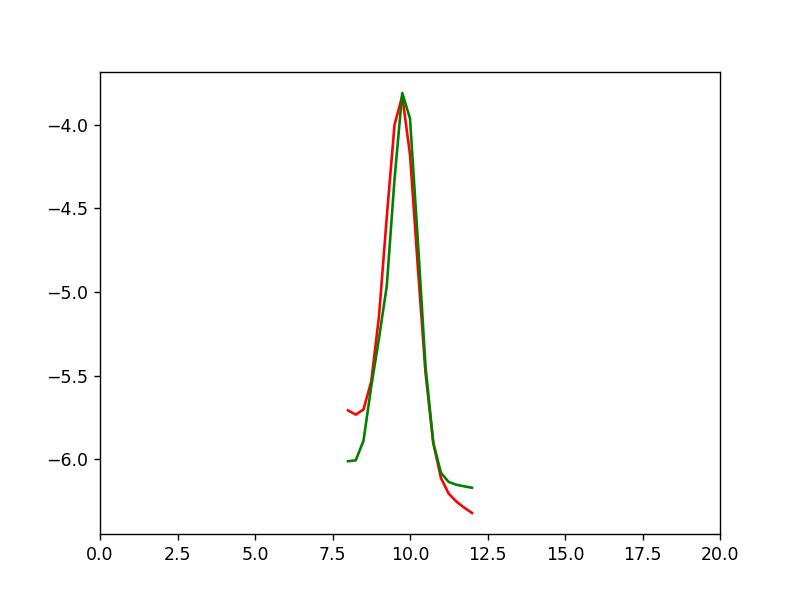

In [14]:
#print out averaged power spectrum model fit 
healtX = fm.fooofed_spectrum_
healtY = fm_d.freqs
deprX = fm_d.fooofed_spectrum_

figure(7)
plt.xlim([0, 20])
plt.plot(healtY, deprX,  color =  'red')
plt.plot(healtY, healtX, color = "green")
plt.show()